<a href="https://colab.research.google.com/github/BUKHALA/Customer-Shopping-Trends/blob/main/Customer_Shopping_Trends(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the data
file_path = '/content/drive/MyDrive/shopping_trends_updated.csv'
data = pd.read_csv(file_path)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.shape

(3900, 18)

In [5]:
data.size

70200

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
#Checking for missing values
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Customer ID    Age  Gender  Item Purchased  Category  \
0           False  False   False           False     False   
1           False  False   False           False     False   
2           False  False   False           False     False   
3           False  False   False           False     False   
4           False  False   False           False     False   
...           ...    ...     ...             ...       ...   
3895        False  False   False           False     False   
3896        False  False   False           False     False   
3897        False  False   False           False     False   
3898        False  False   False           False     False   
3899        False  False   False           False     False   

      Purchase Amount (USD)  Location   Size  Color  Season  Review Rating  \
0                     False     False  False  False   False          False   
1                     False     False

In [9]:
#Drop missing values
data.dropna(inplace=True)

In [10]:
#Checking for duplicates
data.duplicated().sum()

0

In [ ]:
#Problem statement for the data
#Which gender has the highest number of purchases?
#How does the frequency of purchase vary across different age groups?
#How does the presence of a discount affect the purchase decision of customers?
#How does the average purchase amount differ between male and female customers?
#Do we have certain months or seasons where customers spending is high?

In [11]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

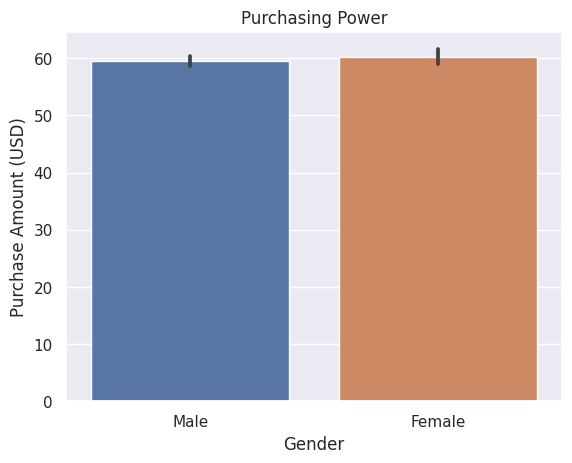

In [12]:
#1. Which gender has the highest number of purchase?
#Bar Plot:

data.Gender.value_counts()
sns.barplot(data, x = 'Gender' , y = 'Purchase Amount (USD)')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchasing Power')

plt.show()

CONCLUSION: From the analyses on the data, we can conclude that all genders have an equal number of purchases, there is no significant difference in their purchase. The number of purchase is evenly distributed.


In [13]:
#2. Do we have certain months or seasons where customers spending is high?
#Histogram
data['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [14]:
#Filtering data
data['Season'].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

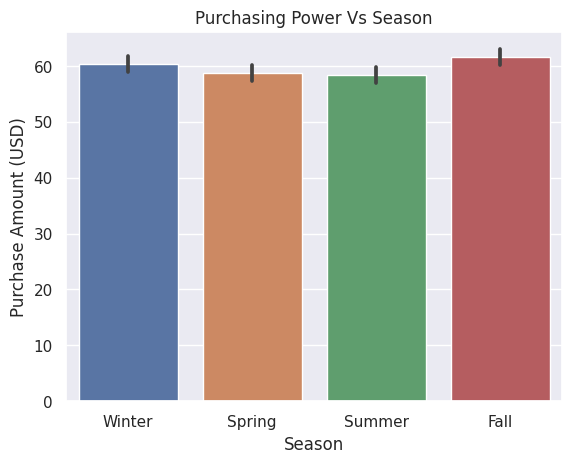

In [15]:
#plot barplot

sns.barplot(data, x = 'Season' , y = 'Purchase Amount (USD)')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchasing Power Vs Season')

plt.show()

Conclusion: After analyzing the data we can conclude that customer spending is significantly high during spring season.
##WHY?
-Change in season from Winter(Cold season) to spring(warm weather). Hence we are expecting more outdoor activities thus purchase of more outdoor outfits.

-Vacation: During this warm season most people are more likely to travel hence more spending

-Seasonal Sales & Promotions: Retailers often offer discounts, promotions and sales during this season to attract customers and encourage spending.


In [16]:
# create a function to encode categorical variables
from sklearn.preprocessing import OrdinalEncoder
def encode_cat(data, cat_var):
    encoder = OrdinalEncoder()
    data[cat_var] = encoder.fit_transform(data[[cat_var]])
    return data

# for loop to encode all categorical variables
for i in data.columns:
    if data[i].dtypes == 'object':
        encode_cat(data, i)

#Check data
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1.0,2.0,1.0,53,16.0,0.0,7.0,3.0,3.1,1.0,1.0,1.0,1.0,14,5.0,3.0
1,2,19,1.0,23.0,1.0,64,18.0,0.0,12.0,3.0,3.1,1.0,1.0,1.0,1.0,2,1.0,3.0
2,3,50,1.0,11.0,1.0,73,20.0,2.0,12.0,1.0,3.1,1.0,2.0,1.0,1.0,23,2.0,6.0
3,4,21,1.0,14.0,2.0,90,38.0,1.0,12.0,1.0,3.5,1.0,3.0,1.0,1.0,49,4.0,6.0
4,5,45,1.0,2.0,1.0,49,36.0,1.0,21.0,1.0,2.7,1.0,2.0,1.0,1.0,31,4.0,0.0


In [17]:
#Create our target and features
X = data.drop(columns=['Gender']) #Season with highest no of purchase
y = data['Gender']

#Split data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [18]:
#Since this is a classsification task. we will fit a random model.
#Fit a random forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit (X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Show our classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#We find out that our model is accurate in predicting 100% for both male and female.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       278
         1.0       1.00      1.00      1.00       697

    accuracy                           1.00       975
   macro avg       1.00      1.00      1.00       975
weighted avg       1.00      1.00      1.00       975



In [19]:
#Extract our model as a pickel file.
#WHY? So that when we will be creating our streamlit tab we dont have to repeat the fit part, just go ahead and get predictions from our model.
import pickle
pickle.dump(model,open('model.pkl','wb'))